# Data Exploratoty Analysis top 50 bestselling amazon books, 2009-2019

- Importing the required libraries  

In [1]:
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.image as img

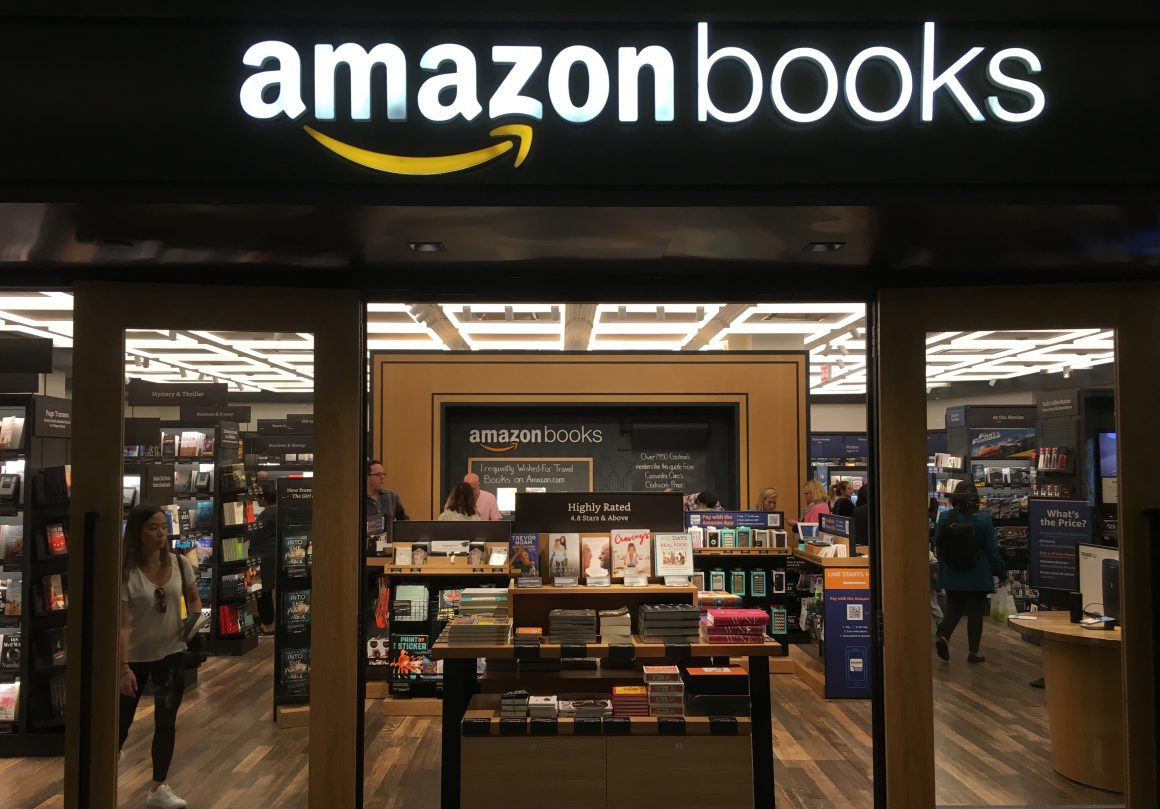

In [2]:
# Let's import the project's cover image
from PIL import Image
image = Image.open("/work/amazon_books.jpg")
image.show()

### Overview of the data set

- Read csv file and explore basic information

In [3]:
df = pd.read_csv('/work/amazon_best_sellers_books.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

- 550 rows and 7 columns: Name, Author, User Rating, Reviews, Price,Year and Genre. 

- Checking for null values

In [5]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

- Data set doesn't have null values and looks clean from the start.

- Let's now check info about data frame variables 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


- 4 numeric columns and 3 categorical. 

- Let's now check unique values in every column

In [7]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

- Genre column only has two different values. Let's explore what it contains. 

In [8]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

- It seems a good idea now to convert the genre column to category type as it has only two unique values.  

In [9]:
df['Genre'] = df['Genre'].astype('category')

- Let's now check basic statistics for the 4 numeric columns

In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


- Reviews and Price columns most probably have outliers as they have a considerable difference between mean and median.
- Also, those variables have a big difference between 75% and max value, and between 25% and min value. 

### Analysing data set's variables

### Name (books)

- Let's see the books that were in the bestselling list for more years. 

In [11]:
# count of the number of times each book appears on the yearly top 50 best selling list
books_count = df['Name'].value_counts()
books_count.iloc[:55,]

Publication Manual of the American Psychological Association, 6th Edition                            10
StrengthsFinder 2.0                                                                                   9
Oh, the Places You'll Go!                                                                             8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                          7
The Very Hungry Caterpillar                                                                           7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                             6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                     6
Laugh-Out-Loud Jokes for Kids                                                                         5
Wonder                                                                                                5
The Official SAT Study Guide                                    

- About 40 books out of 351 were on the list for more than two years. 
- Some of the top ten books could be recognized as "self help" or "self improvement". 
- The top book seems to be a specialized or an academic publication. 
- There seems to be not too much classic literature on this list.

- Let's now see books sorted by user ratings

In [12]:
# Top 20 books by user rating
top20_books_rating = df.sort_values('User Rating', ascending=False).iloc[:50,]
top20_books_rating.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction


- Books aimed at young audiences seem to champion the user's preferences on this list. 

In [35]:
# Bottom 20 books by user rating
bottom20_books_rating = df.sort_values('User Rating').iloc[:20,]
bottom20_books_rating.value_counts()

Name                                                                                      Author          User Rating  Reviews  Price  Year  Genre      
Allegiant                                                                                 Veronica Roth   3.9          6310     13     2013  Fiction        1
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)  E L James       3.8          47265    14     2012  Fiction        1
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                       Donna Tartt     3.9          33844    20     2013  Fiction        1
The Elegance of the Hedgehog                                                              Muriel Barbery  4.0          1859     11     2009  Fiction        1
The Casual Vacancy                                                                        J.K. Rowling    3.3          9372     12     2012  Fiction        1
StrengthsFinder 2.0                                      

- A J. K. Rowling book is the lowest ranked book!

### Author

- Let's see the top 20 authors by User Rating, price mean and number of books

In [14]:
# top 20 authors by user rating
top20_authors_rating = df.groupby('Author')['User Rating'].mean().sort_values(
    ascending=False).iloc[:20]
top20_authors_rating

Author
Jill Twiss               4.900000
Nathan W. Pyle           4.900000
Chip Gaines              4.900000
Rush Limbaugh            4.900000
Bill Martin Jr.          4.900000
Emily Winfield Martin    4.900000
Pete Souza               4.900000
Patrick Thorpe           4.900000
Lin-Manuel Miranda       4.900000
Sherri Duskey Rinker     4.900000
Alice Schertle           4.900000
Dav Pilkey               4.900000
Eric Carle               4.900000
Sarah Young              4.900000
Dr. Seuss                4.877778
Mark R. Levin            4.850000
J. K. Rowling            4.850000
Brandon Stanton          4.833333
Marjorie Sarnat          4.800000
Joanna Gaines            4.800000
Name: User Rating, dtype: float64

In [15]:
# top 20 authors by mean price 
df_top20_authors_price = df.groupby('Author')['Price'].mean().sort_values(
    ascending=False).iloc[:20]
df_top20_authors_price

Author
American Psychiatric Association      105.000000
Lin-Manuel Miranda                     54.000000
Bill Simmons                           53.000000
American Psychological Association     46.000000
Alan Moore                             42.000000
The College Board                      39.333333
Paulo Coelho                           39.000000
J. K. Rowling                          35.000000
Jaycee Dugard                          32.000000
Thomas Piketty                         28.000000
Wizards RPG Team                       27.000000
Julia Child                            27.000000
Thug Kitchen                           23.000000
Jon Meacham                            23.000000
Mike Moreno                            22.000000
Pete Souza                             22.000000
Ina Garten                             21.666667
Timothy Ferriss                        21.000000
Thomas Campbell                        21.000000
Eric Larson                            21.000000
Name: Price, 

In [16]:
# top 20 authors by number of books ranked
top20_authors_number_books = df['Author'].value_counts().iloc[:20]
top20_authors_number_books

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Eric Carle                             7
Bill O'Reilly                          7
Stephenie Meyer                        7
Dav Pilkey                             7
Sarah Young                            6
Stieg Larsson                          6
Don Miguel Ruiz                        6
The College Board                      6
Harper Lee                             6
E L James                              6
J.K. Rowling                           6
Name: Author, dtype: int64

- Let's check top20_authors_number_books' mean reviews, user rating and price, sorted by price

In [17]:
top20_authors_columns = df[df['Author'].isin(top20_authors_number_books.index)][['Author','User Rating', 'Reviews', 'Price']]
top20_authors_columns


,Author,User Rating,Reviews,Price
38,Stephenie Meyer,4.6,9769,13
42,Jeff Kinney,4.8,4505,0
46,Suzanne Collins,4.7,22614,11
47,Suzanne Collins,4.7,22614,11
48,Suzanne Collins,4.7,22614,11
...,...,...,...,...
508,Harper Lee,4.8,26234,0
509,Harper Lee,4.8,26234,7
513,Stephenie Meyer,4.7,11676,9
528,Dr. Seuss,4.7,1873,14


In [18]:
top20_authors_columns_grouped = top20_authors_columns.groupby('Author')[['Author','User Rating', 'Reviews', 'Price']].mean(

).sort_values(by='Price', ascending=False)

top20_authors_columns_grouped

,User Rating,Reviews,Price
Author,,,
American Psychological Association,4.500000,8580.000000,46.000000
The College Board,4.383333,1135.333333,39.333333
Stephen R. Covey,4.642857,7353.571429,20.571429
J.K. Rowling,4.450000,11755.833333,20.166667
Stephenie Meyer,4.657143,6294.000000,19.857143
Gary Chapman,4.736364,13268.909091,17.181818
Gallup,4.000000,5069.000000,17.000000
E L James,4.233333,29668.500000,15.333333
Suzanne Collins,4.663636,25302.636364,13.363636


### Genre

- Let's check now the fiction and non fiction genre categories

In [19]:
fig = px.histogram(df, x='Genre', title='Genre', color='Genre')
fig.show()

- Data set contains 60 more non fiction values than fiction values.
- This is not an individual book count as a book can be counted more than once, if it's listed in more than one year.  

In [20]:
genre_by_year = df.groupby('Year')['Genre'].value_counts().reset_index(level
=0).rename(columns={'Genre':'Genre Count'})
genre_by_year

,Year,Genre Count
Genre,,
Non Fiction,2009,26
Fiction,2009,24
Non Fiction,2010,30
Fiction,2010,20
Non Fiction,2011,29
Fiction,2011,21
Non Fiction,2012,29
Fiction,2012,21
Non Fiction,2013,26


In [21]:
genre_by_year_hist = px.histogram(df, x='Year', color='Genre',pattern_shape='Genre')
genre_by_year_hist.show()

- Non fiction books count for more than half of ranked books every year, with the only exception of 2014

### User Rating

- Let's now review the user rating column

In [22]:
df['User Rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

- The mean (4.6) is quite close to median (4.7) which suggests it's a normal distribution. 
- However, as the mean is lower than the median we may have some outliers on the lower side of distribution (left).

In [23]:
fig = px.histogram(df, x='User Rating', title='User Rating', marginal='box', 
hover_data=df[['Name', 'Author']])
fig.show()

- As expected, we have some outliers on the left side of distribution, which still may be considered normal 

- Let's see the behavior of user rating per year and genre

In [24]:
fig = px.scatter(df, x='Year', y='User Rating', title='User Rating per Year', color='Genre',
hover_data = df[['Name','Author']]) 
fig.show()

- This variable has a similiar distribution every year with just a few outliers.

### Reviews

In [25]:
df['Reviews'].describe()

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

- Mean (11953) quite higher than median (8580) 
- For sure it'll be a rightly skewed distribution with outliers on the higher side (right) of distribution.

In [26]:
fig = px.histogram(df, x='Reviews', title='Reviews', marginal='box', 
hover_data=df[['Name', 'Author']])
fig.show()

- As expected, a higly right skewed distribution with huge outliers on the right.

In [27]:
fig = px.scatter(df, x='Year', y='Reviews', title='Number of Reviews per Year', color='Genre',
hover_data = df[['Name','Author']])
fig.show()


- All years have a similar distribution range between 0 and 30k aprox but most of them have huge outliers.
- Biggest outliers seem to start in 2012. Those books could be controversial or very popular for some reason as they encouraged readers to leave more reviews in the amazon website or app.

### Price

In [28]:
df['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

- As mean (13.1) higher that median (11.0) there could be outliers on the higher side
- Distribution should be slighlty right skewed.
- There are free books!

In [29]:
fig = px.histogram(df, x='Price', title='Price', marginal='box', 
hover_data=df[['Name', 'Author']])
fig.show()

- Distribution just as expected.

- It seems fair to know some more about the free books. Let's check on them.

In [30]:
df.sort_values(by='Price').head(12)

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction


- These are the ones, some are quite famous. It looks odd but they could be offered for free under certain circumstances. May be.

- Let's see how prices behave every year

In [31]:
fig = px.scatter(df, x='Year', y='Price', title='Price of Books per Year', color='Genre',
hover_data = df[['Name','Author']])
fig.show()

- All years have a very similar price range, with some high outliers. 
- Most of the books higher than $40 are non fiction books.
- All books are below $60, except 3 of them in 2009, 2013 and 2014.
- Non fiction books seem to be more expensive in average than fiction ones. Let's see. 

### Correlations

- Let's check correlations of our numeric variables (except year)

In [32]:
df[['User Rating', 'Reviews', 'Price']].corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


In [33]:
fig = px.scatter_matrix(df, dimensions=['User Rating', 'Reviews', 'Price'], color='Genre',
 hover_data=df[['Name', 'Author']], opacity=0.6, width=1000, height=1000, title='Correlations')
fig.show()

- There seems not to be significative correlations between variables to consider further analysis.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ff7c6dc-59c6-4fb9-8ec1-f8f9b7285e78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>